# Multiclass NN

In this notebook we will put together a neural netword and train it on the MNIST dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import common_functions as cf #My library of relevant functions
import tensorflow as tf #for loading mnist data
from sklearn.model_selection import train_test_split #to split into train/cv/test samples

2023-07-02 14:53:38.210773: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/phil/MultiNest/lib/:
2023-07-02 14:53:38.210799: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load the MNIST data set and split into training and test sets.

In [2]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data:
    x = data['x_train']
    y = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    
#Separate out a cross validation set of the same size as the test set
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=(1/6), random_state=1)

Check sizes of each set:

In [3]:
print (x_train.shape, y_train.shape)
print (x_cv.shape, y_cv.shape)
print (x_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


Plot some of the data:

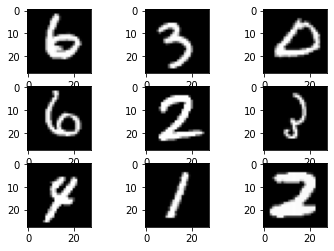

In [4]:
fig = plt.figure()
for i in range(1,10):
    fig.add_subplot(3, 3, i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
#Reshape images into one dimension
x_train = x_train.reshape((50000,28*28))
x_cv = x_cv.reshape((10000,28*28))
x_test = x_test.reshape((10000,28*28))

Now we have the data it's time to put together the learning algortihm. I want to build a neural network with 3 layers with the following number of units in each:
Layer 1: 25   
Layer 2: 15   
Layer 3: 10 (10 classes)   

The network is defined below. For the activation (g), we will use RelU for layers 1 and 2, and a linear activation function for layer 3.

In [6]:
def sequential(x, params):
    a1 = cf.my_dense(x,  params["W1"], params["b1"], cf.relu)
    a2 = cf.my_dense(a1,  params["W2"], params["b2"], cf.relu)
    a3 = cf.my_dense(a2,  params["W3"], params["b3"], cf.softmax)
    
    return(a3)

In the next cell we initialise W and b. As the images are 28 x 28 pixels we will have 784 inputs, so the sizes will be as follows:  
W1: (784, 25), b1: (25,)  
W2: (25, 15), b2: (15,)  
W3: (15, 10), b3: (10,)

In [7]:
W1 = np.zeros((784,25))
b1 = np.zeros((25))

W2 = np.zeros((25,15))
b2 = np.zeros((15))

W3 = np.zeros((15,10))
b3 = np.zeros((10))

params = {"W1": W1, "b1": b1, "W2": W2, "b2": b2, "W3": W3, "b3": b3}

init = sequential(x_train, params) #initial prediction

Next up we will train the model using forward and back propagation.

In [8]:
learning_rate = 0.01
num_iterations = 1000

parameters = cf.train_nn(x_train, y_train, params, learning_rate, num_iterations)

Iteration: 0/1000


/home/phil/ML_Practice/ml-experiments/NN/common_functions.py:44: RuntimeWarning: divide by zero encountered in log
  cost =  ((1/m) * np.sum( -y[0]*np.log(AL) - (1-y[0])*np.log(1-AL) ))
/home/phil/ML_Practice/ml-experiments/NN/common_functions.py:163: RuntimeWarning: divide by zero encountered in true_divide
  dAL = -(np.divide(y[0], AL) - np.divide(1 - y[0], 1 - AL))


cost: -inf
Iteration: 1/1000
cost: nan
Iteration: 2/1000
cost: nan
Iteration: 3/1000
cost: nan
Iteration: 4/1000
cost: nan
Iteration: 5/1000
cost: nan
Iteration: 6/1000
cost: nan
Iteration: 7/1000
cost: nan
Iteration: 8/1000
cost: nan
Iteration: 9/1000
cost: nan
Iteration: 10/1000
cost: nan
Iteration: 11/1000
cost: nan
Iteration: 12/1000
cost: nan
Iteration: 13/1000
cost: nan
Iteration: 14/1000
cost: nan
Iteration: 15/1000
cost: nan
Iteration: 16/1000
cost: nan
Iteration: 17/1000
cost: nan
Iteration: 18/1000
cost: nan
Iteration: 19/1000
cost: nan
Iteration: 20/1000
cost: nan
Iteration: 21/1000
cost: nan


KeyboardInterrupt: 